DS11 python による iris データの k近傍法

In [ ]:
# google colab で実行する場合は以下のコメントアウトを外す
#! wget https://github.com/KHiraGit/sudspg_ds/raw/main/iris.csv

In [1]:
# ライブラリをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

<Figure size 1080x468 with 0 Axes>

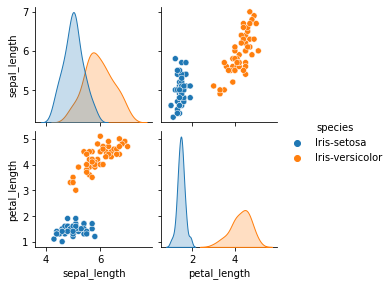

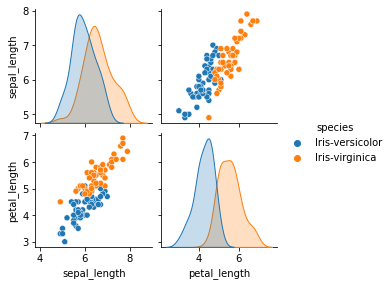

In [2]:
# irisデータ(csv形式)から読み込む
iris_df = pd.read_csv('iris.csv')
iris_df = iris_df[['sepal_length', 'petal_length', 'species']]

# setosa x versicolor のデータフレームを作成
iris_df_1 = iris_df[iris_df['species'] != 'Iris-virginica']
iris_data_1 = iris_df_1[['sepal_length', 'petal_length']]
iris_target_1 = iris_df_1['species']

# versicolor x virginica のデータフレームを作成
iris_df_2 = iris_df[iris_df['species'] != 'Iris-setosa']
iris_data_2 = iris_df_2[['sepal_length', 'petal_length']]
iris_target_2 = iris_df_2['species']

# ペアプロットを表示
plt.figure(figsize=(15, 6.5))
sns.pairplot(iris_df_1, hue='species', height=2)
sns.pairplot(iris_df_2, hue='species', height=2)

In [22]:
# setosa x versicolor について、knn (k=1,5) を作成して識別精度を確認
clf_1 = KNeighborsClassifier(n_neighbors=1)
clf_1 = clf_1.fit(iris_data_1, iris_target_1) 
predict = clf_1.predict(iris_data_1)
print('knn (k=1) : accuracy_score', metrics.accuracy_score(iris_target_1, predict))
print('knn (k=1) : f1_score', metrics.f1_score(iris_target_1, predict, average="micro"))

clf_2 = KNeighborsClassifier(n_neighbors=5)
clf_2 = clf_2.fit(iris_data_1, iris_target_1)
predict = clf_2.predict(iris_data_1)
print('knn (k=5) : accuracy_score', metrics.accuracy_score(iris_target_1, predict))
print('knn (k=5) : f1_score', metrics.f1_score(iris_target_1, predict, average="micro"))

# 散布図表示のコードは notebook で配布

knn (k=1) : accuracy_score 1.0
knn (k=1) : f1_score 1.0
knn (k=5) : accuracy_score 1.0
knn (k=5) : f1_score 1.0


e:\sudspg\su_dspg_ds\venv\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
e:\sudspg\su_dspg_ds\venv\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


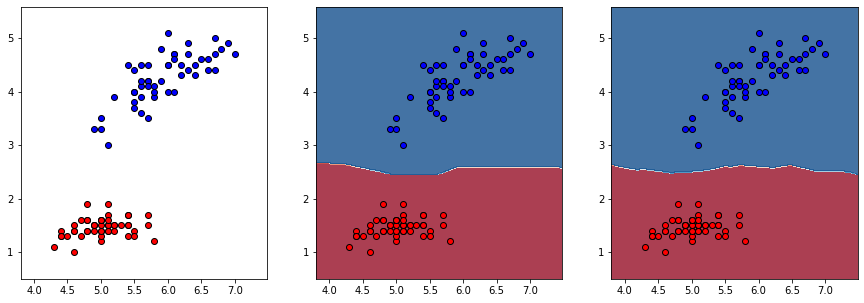

In [23]:
# 散布図表示のコード
x_min, x_max = iris_data_1['sepal_length'].min() - 0.5, iris_data_1['sepal_length'].max() + 0.5
y_min, y_max = iris_data_1['petal_length'].min() - 0.5, iris_data_1['petal_length'].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

figure = plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 3, 1)
ax.scatter(iris_df_1[iris_df_1['species'] != 'Iris-setosa']['sepal_length'], 
           iris_df_1[iris_df_1['species'] != 'Iris-setosa']['petal_length'], c='blue', edgecolors='black')
ax.scatter(iris_df_1[iris_df_1['species'] != 'Iris-versicolor']['sepal_length'], 
           iris_df_1[iris_df_1['species'] != 'Iris-versicolor']['petal_length'], c='red', edgecolors='black')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax = plt.subplot(1, 3, 2)
Z = clf_1.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
for i in range(len(Z)):
    for j in range(len(Z[i])):
        if Z[i][j] == 'Iris-setosa':
            Z[i][j] = -1
        else:
            Z[i][j] = 1
r2 = clf_1.score(iris_data_1, iris_target_1)
ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
ax.scatter(iris_df_1[iris_df_1['species'] != 'Iris-setosa']['sepal_length'], 
           iris_df_1[iris_df_1['species'] != 'Iris-setosa']['petal_length'], c='blue', edgecolors='black')
ax.scatter(iris_df_1[iris_df_1['species'] != 'Iris-versicolor']['sepal_length'], 
           iris_df_1[iris_df_1['species'] != 'Iris-versicolor']['petal_length'], c='red', edgecolors='black')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax = plt.subplot(1, 3, 3)
Z = clf_2.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
for i in range(len(Z)):
    for j in range(len(Z[i])):
        if Z[i][j] == 'Iris-setosa':
            Z[i][j] = -1
        else:
            Z[i][j] = 1
r2 = clf_2.score(iris_data_1, iris_target_1)
ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
ax.scatter(iris_df_1[iris_df_1['species'] != 'Iris-setosa']['sepal_length'], 
           iris_df_1[iris_df_1['species'] != 'Iris-setosa']['petal_length'], c='blue', edgecolors='black')
ax.scatter(iris_df_1[iris_df_1['species'] != 'Iris-versicolor']['sepal_length'], 
           iris_df_1[iris_df_1['species'] != 'Iris-versicolor']['petal_length'], c='red', edgecolors='black')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

plt.show()

In [6]:
# setosa x versicolor について、knn (k=1,5) を作成して識別精度を確認
clf_1 = KNeighborsClassifier(n_neighbors=1)
clf_1 = clf_1.fit(iris_data_2, iris_target_2)
predict = clf_1.predict(iris_data_2)
print('knn (k=1) : accuracy_score', metrics.accuracy_score(iris_target_2, predict))

clf_2 = KNeighborsClassifier(n_neighbors=5)
clf_2 = clf_2.fit(iris_data_2, iris_target_2)
predict = clf_2.predict(iris_data_2)
print('knn (k=5) : accuracy_score', metrics.accuracy_score(iris_target_2, predict))

# 散布図表示のコードは notebook で配布

knn (k=1) : accuracy_score 0.99
knn (k=5) : accuracy_score 0.94


e:\sudspg\su_dspg_ds\venv\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
e:\sudspg\su_dspg_ds\venv\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


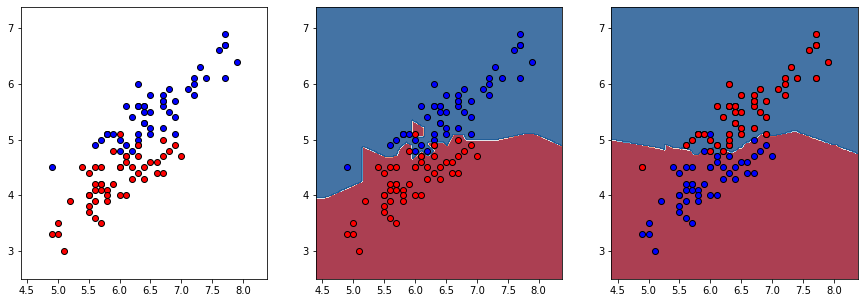

In [20]:
# 散布図表示のコード
x_min, x_max = iris_data_2['sepal_length'].min() - 0.5, iris_data_2['sepal_length'].max() + 0.5
y_min, y_max = iris_data_2['petal_length'].min() - 0.5, iris_data_2['petal_length'].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
mesh_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])

figure = plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 3, 1)
ax.scatter(iris_df_2[iris_df_2['species'] != 'Iris-versicolor']['sepal_length'], 
           iris_df_2[iris_df_2['species'] != 'Iris-versicolor']['petal_length'], c='blue', edgecolors='black')
ax.scatter(iris_df_2[iris_df_2['species'] != 'Iris-virginica']['sepal_length'], 
           iris_df_2[iris_df_2['species'] != 'Iris-virginica']['petal_length'], c='red', edgecolors='black')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax = plt.subplot(1, 3, 2)
Z = clf_1.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
for i in range(len(Z)):
    for j in range(len(Z[i])):
        if Z[i][j] == 'Iris-versicolor':
            Z[i][j] = -1
        else:
            Z[i][j] = 1
r2 = clf_1.score(iris_data_2, iris_target_2)
ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
ax.scatter(iris_df_2[iris_df_2['species'] != 'Iris-versicolor']['sepal_length'], 
           iris_df_2[iris_df_2['species'] != 'Iris-versicolor']['petal_length'], c='blue', edgecolors='black')
ax.scatter(iris_df_2[iris_df_2['species'] != 'Iris-virginica']['sepal_length'], 
           iris_df_2[iris_df_2['species'] != 'Iris-virginica']['petal_length'], c='red', edgecolors='black')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax = plt.subplot(1, 3, 3)
Z = clf_2.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
for i in range(len(Z)):
    for j in range(len(Z[i])):
        if Z[i][j] == 'Iris-versicolor':
            Z[i][j] = -1
        else:
            Z[i][j] = 1
r2 = clf_2.score(iris_data_2, iris_target_2)
ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
ax.scatter(iris_df_2[iris_df_2['species'] != 'Iris-setosa']['sepal_length'], 
           iris_df_2[iris_df_2['species'] != 'Iris-setosa']['petal_length'], c='blue', edgecolors='black')
ax.scatter(iris_df_2[iris_df_2['species'] != 'Iris-versicolor']['sepal_length'], 
           iris_df_2[iris_df_2['species'] != 'Iris-versicolor']['petal_length'], c='red', edgecolors='black')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

plt.show()

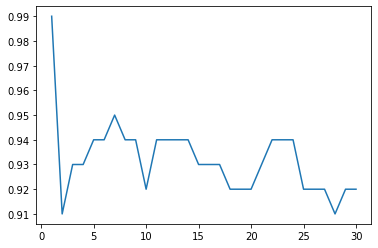

In [9]:
accuracy = []
for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(iris_data_2, iris_target_2)
    pred = knn.predict(iris_data_2)
    accuracy.append(metrics.accuracy_score(iris_target_2, pred))

plt.plot(range(1, 31), accuracy)